In [1]:
from tidy_data import df_speeches_cleanned

df_cleanned = df_speeches_cleanned.copy()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alvar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alvar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#Use textblob in python: https://www.kaggle.com/code/blessondensil294/beginner-nlp-product-sentiment-analysis-textblob 

import pandas as pd
from textblob import TextBlob

df_sentiment_blob = pd.DataFrame(columns=['date', 'speaker','party','text', 'sentiment', 'subjectivity'])

# temporary list to store the dictionaries
result_data = []

# Loop through the df
for index, row in df_cleanned.iterrows():
    # Get data from df columns
    text = row['text']
    date = row['date']
    party = row['party']
    speaker = row['speaker']

    # Get the sentiment and subjectivity
    sentiment, subjectivity = TextBlob(text).sentiment

    # Append the results to the list
    result_data.append({
        'date': date,
        'speaker': speaker,
        'party': party,
        'speech': text,
        'sentiment': sentiment,
        'subjectivity': subjectivity
    })

# Create a DataFrame from the list of dictionaries
df_sentiment_blob = pd.DataFrame(result_data)


In [17]:
# Group by the 'speaker' column and count the number of speeches
speeches_by_president = df_sentiment_blob.groupby('speaker')['speech'].count()

# Convert the series to a DataFrame
speeches_by_president_df = speeches_by_president.reset_index(name='number_of_speeches')

# Display the DataFrame
print(speeches_by_president_df)


          speaker  number_of_speeches
0    Barack Obama                 345
1  George W. Bush                  72
2       Joe Biden                  75


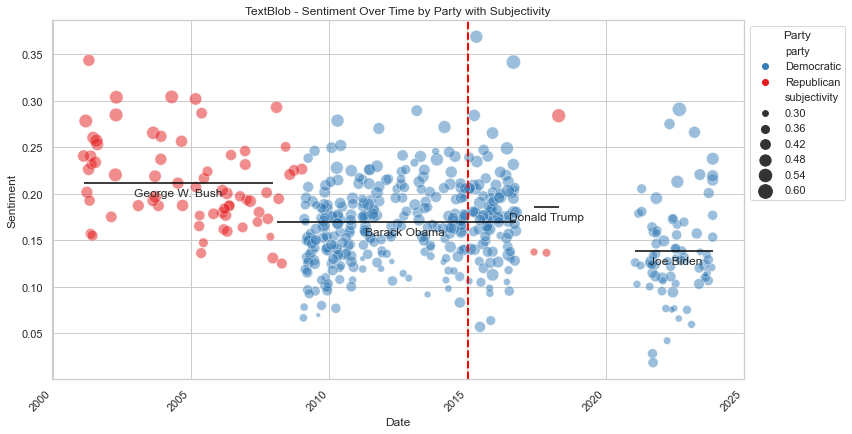

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime

# plot style
sns.set(style="whitegrid")
palette = sns.color_palette("Set1", n_colors=2)[::-1]

# Create a scatter plot
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(
    data=df_sentiment_blob,
    x='date',
    y='sentiment',
    hue='party',
    palette=palette,
    size='subjectivity',  
    sizes=(20, 200), 
    alpha=0.5
)

# Set labels and title
plt.title('TextBlob - Sentiment Over Time by Party with Subjectivity')
plt.xlabel('Date')
plt.ylabel('Sentiment')

# Set x-axis major ticks to show specific years
scatter_plot.xaxis.set_major_locator(mdates.YearLocator(base=5))  # Set major ticks to be every 5 years
scatter_plot.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks as years

# legend
plt.legend(title='Party', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  # Adjust the padding between and around subplots.


# date formatting
##scatter_plot.set_xticklabels(scatter_plot.get_xticklabels(), rotation=45, horizontalalignment='right') ag
plt.xticks(rotation=45, horizontalalignment='right')

### Include the speaker name in the chart
# Annotate speaker names
# Define time intervals with corresponding presidents
presidents_intervals = {
    'George W. Bush': (2000, 2008),
    'Barack Obama': (2008, 2017),
    'Donald Trump': (2017, 2021),
    'Joe Biden': (2021, 2024)  # Adjust end year as needed
}

for president, interval in presidents_intervals.items():
    start, end = interval
    # Filter data for the given president's term
    interval_data = df_sentiment_blob[(df_sentiment_blob['date'].dt.year >= start) & (df_sentiment_blob['date'].dt.year < end)]
    
    if not interval_data.empty:  # Check if there is data in the interval
        mean_date = interval_data['date'].mean()
        mean_sentiment = interval_data['sentiment'].mean()
        
        # Draw a horizontal line for the mean sentiment
        plt.hlines(mean_sentiment, interval_data['date'].min(), interval_data['date'].max(), colors='black', linestyles='solid')

        # Annotate the president's name
        plt.annotate(president,
                     (mean_date, mean_sentiment),
                     textcoords="offset points",
                     xytext=(0, -10),  # Offset position of text from point
                     ha='center',  # Center text horizontally
                     va='center')  # Center text vertically

important_date = datetime.datetime(2015, 1, 12)  # Year, Month, Day
plt.axvline(x=important_date, ymin=0, ymax=1, color='red', linestyle='--', lw=2)

# Define time intervals



plt.show()


In [27]:
interval_data

,date,speaker,party,speech,sentiment,subjectivity
4,2022-03-24,Joe Biden,Democratic,"1. We, the Leaders of the G7, met today in B...",0.041791,0.340796
18,2022-07-12,Joe Biden,Democratic,The United States and Mexico affirm our broa...,0.141255,0.380776
19,2023-02-10,Joe Biden,Democratic,"Today, President Joseph R. Biden, Jr. of the...",0.059318,0.352803
20,2023-09-20,Joe Biden,Democratic,Our Administrations affirm our mutual commit...,0.106508,0.420937
21,2022-06-27,Joe Biden,Democratic,"Following the further invasion of Ukraine, R...",0.076611,0.328512
...,...,...,...,...,...,...
481,2022-08-07,Joe Biden,Democratic,Today Senate Democrats sided with American f...,0.212946,0.549897
483,2023-09-25,Joe Biden,Democratic,Today I am proud to announce that the United...,0.200794,0.457937
484,2022-04-25,Joe Biden,Democratic,No one should die from a mosquito bite. Seve...,0.275144,0.470058
486,2023-05-22,Joe Biden,Democratic,Today's agreement between the Department of ...,0.120000,0.425000


In [20]:
import pandas as pd
from scipy import stats

# Assuming 'df_sentiment_blob' is your DataFrame and it has columns 'speaker' and 'sentiment'

# First, we create a list that contains the sentiment scores for each president's speeches
groups = df_sentiment_blob.groupby('speaker')['sentiment'].apply(list)

# Perform the ANOVA test
f_value, p_value = stats.f_oneway(*groups)

print(f"F-Value: {f_value}, P-Value: {p_value}")

# Check if the p-value is less than the significance level (usually 0.05) to determine if the differences are statistically significant
if p_value < 0.05:
    print("There are statistically significant differences between the groups.")
else:
    print("There are no statistically significant differences between the groups.")


F-Value: 47.940466094267805, P-Value: 9.72795006910054e-20
There are statistically significant differences between the groups.


Levene's test for homogeneity of variances: Stat=1.1173440238006282, P-value=0.3279812974080902
Shapiro-Wilk test for normality of residuals: Stat=0.9848058819770813, P-value=5.1386276027187705e-05


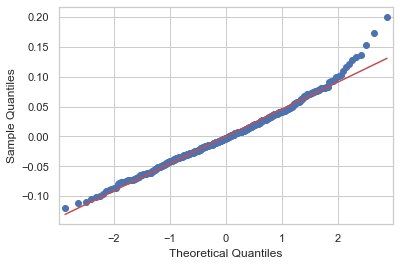

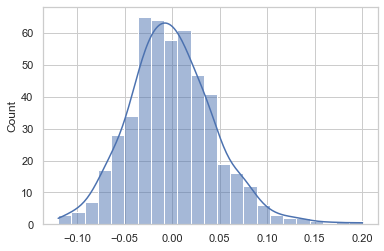

In [21]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_sentiment_blob' is your DataFrame and it has columns 'speaker' and 'sentiment'
# You may need to adjust this code to fit the structure of your DataFrame

# Test for homogeneity of variances
grouped_data = [group['sentiment'].values for name, group in df_sentiment_blob.groupby('speaker')]
levene_stat, levene_p = stats.levene(*grouped_data)
print(f"Levene's test for homogeneity of variances: Stat={levene_stat}, P-value={levene_p}")

# Normality test for residuals using Shapiro-Wilk test
# First, we need to fit an ANOVA model and get the residuals
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model
model = ols('sentiment ~ C(speaker)', data=df_sentiment_blob).fit()
# Get the residuals
residuals = model.resid

# Shapiro-Wilk test
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk test for normality of residuals: Stat={shapiro_stat}, P-value={shapiro_p}")

# If the p-values are less than 0.05, we reject the null hypothesis and assume that variances are not equal or residuals are not normally distributed.

# Visual inspection for normality of residuals using Q-Q plot
sm.qqplot(residuals, line='s')
plt.show()

# Histogram of the residuals
sns.histplot(residuals, kde=True)
plt.show()


In [ ]:
# What are the lowest sentiment speeches?

# Sort the DataFrame by 'sentiment'
df_lowest_sentiment_blob = df_sentiment_blob.sort_values(by='sentiment')


# Create a string
result_phrase = ""
for index, row in lowest_sentiment_df.head(5).iterrows(): # 5 lowest sentiment speeches
    result_phrase += f"{row['speaker']} from {row['party']} gave a speech on {row['date']} with sentiment {row['sentiment']:.4f} and subjectivity {row['subjectivity']:.4f}. The speech was:\n{row['speech']}\n\n"

# Print the result
print(result_phrase)


Joe Biden from Democratic gave a speech on 2021-09-20 00:00:00 with sentiment 0.0150 and subjectivity 0.4444. The speech was:
  Over the past few weeks, I have traveled across the country to see firsthand the devastating human and economic toll of extreme weather exacerbated by climate change. I have walked down streets in Louisiana, New Jersey, and New York, where deadly storms have blown apart the lives of working families, wiping homes and businesses off the map. I've sat with firefighters in Boise, Idaho, and surveyed the damage of the Caldor Fire in Northern California, just one of dozens of large wildfires that together have burned more than 5 million acres of American land so far this year. Communities that over 100 million people—one in three Americans—call home have been struck by extreme weather events in the last few months alone. This is a blinking code red for our Nation. And while we have all seen the graphic and heart-wrenching images of superstorms, wildfires, and flood

In [ ]:

# Sort the DataFrame by 'sentiment'
df_highest_sentiment_blob = df_sentiment_blob.sort_values(by='sentiment', ascending=False)

# Create a string
result_phrase = ""
for index, row in highest_sentiment_df.head(5).iterrows(): # 5 highest sentiment speeches
    result_phrase += f"{row['speaker']} from {row['party']} gave a speech on {row['date']} with sentiment {row['sentiment']:.4f} and subjectivity {row['subjectivity']:.4f}. The speech was:\n{row['speech']}\n\n"

# Print the result
print(result_phrase)



Barack Obama from Democratic gave a speech on 2015-04-30 00:00:00 with sentiment 0.3418 and subjectivity 0.5129. The speech was:
  It is a great pleasure to welcome some outstanding legislators and advocates on behalf of an issue that should always be bipartisan, and that is, making sure that we have the most energy-efficient economy in the world. We've made great strides since the beginning of my administration on everything from doubling fuel efficiency standards on cars to incentivizing smarter policies when we build buildings so that they're not wasting as much energy. And thanks to the leadership of folks like Senators Shaheen and Portman and Bennet and Representative Welch and other folks who are here, what we've seen is a coming together of Republicans and Democrats who are going to facilitate us being much smarter in terms of building buildings, how we use energy. And as a consequence, we're going to save money for consumers, we're going to save money for businesses, and we're 

In [ ]:
### VADER sentiment package

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Compute sentiment scores
analyzer = SentimentIntensityAnalyzer()
results = [analyzer.polarity_scores(x) for x in df_cleanned["text"]] #use speeches' column
sentiment = pd.DataFrame.from_dict(results)
df_sentiment_VADER = pd.concat([df_cleanned,sentiment], axis=1)

,date,speaker,text,party,cleaned_speech,tokens,neg,neu,pos,compound
0,2010-11-20,Barack Obama,"20 November 2010, Lisbon We, the leaders of ...",Democratic,novemb lisbon leader european union unit state...,"[novemb, lisbon, leader, european, union, unit...",0.036,0.730,0.234,0.9998
1,2013-06-18,Barack Obama,2013 LOUGH ERNE Preamble 1. As leaders of th...,Democratic,lough ern preambl leader g8 commit open econom...,"[lough, ern, preambl, leader, g8, commit, open...",0.066,0.712,0.222,1.0000
2,2015-06-08,Barack Obama,"Schloss Elmau, Germany We, the leaders of th...",Democratic,schloss elmau germani leader g7 met elmau annu...,"[schloss, elmau, germani, leader, g7, met, elm...",0.053,0.749,0.198,1.0000
3,2014-11-16,Barack Obama,1. Raising global growth to deliver better l...,Democratic,rais global growth deliv better live standard ...,"[rais, global, growth, deliv, better, live, st...",0.033,0.678,0.289,1.0000
4,2022-03-24,Joe Biden,"1. We, the Leaders of the G7, met today in B...",Democratic,leader g7 met today brussel invit german g7 pr...,"[leader, g7, met, today, brussel, invit, germa...",0.095,0.781,0.125,0.9899


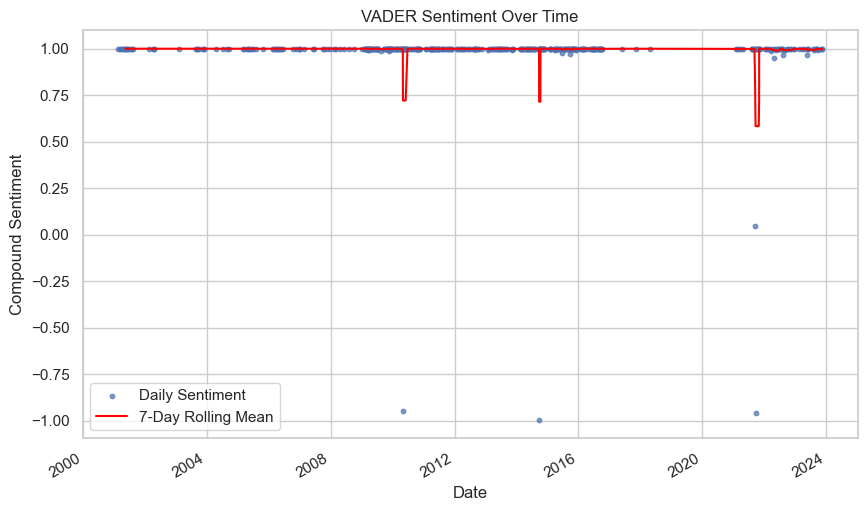

In [ ]:
# Group by date and calculate the average compound sentiment
daily_sentiment = (
    df_sentiment_VADER.groupby(["date"])["compound"]
    .mean()
    .reset_index()
    .sort_values("date")
)

# plot figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot of daily sentiment
ax.scatter(daily_sentiment["date"], daily_sentiment["compound"], s=10, alpha=0.7, label="Daily Sentiment")

# rolling 7-day mean smoothed line
rolling_mean = daily_sentiment["compound"].rolling(window=7).mean()
ax.plot(daily_sentiment["date"], rolling_mean, color='red', label="7-Day Rolling Mean")

# Plotting
fig.autofmt_xdate()
ax.set_title("VADER Sentiment Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Compound Sentiment")
ax.legend()

plt.show()

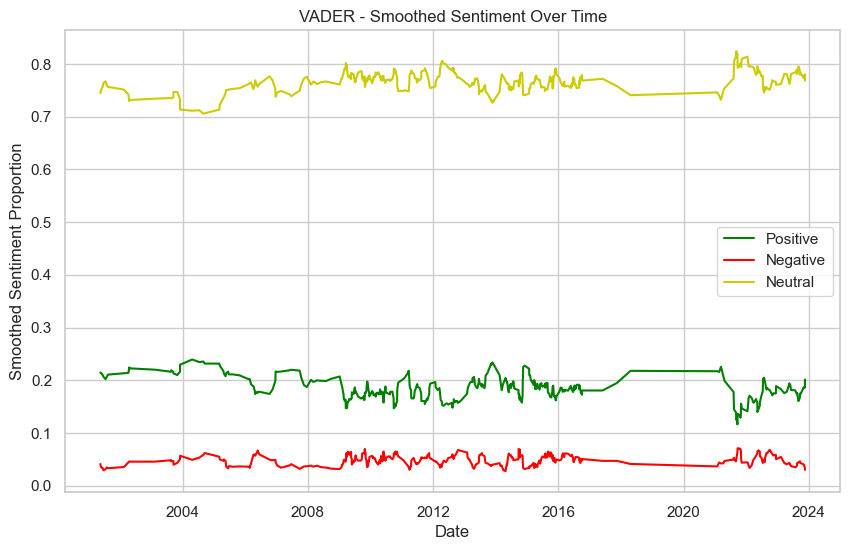

In [ ]:
### Now, let's plot the distribution of negative, positive and neutral words in the text. Let's use a 7-day mean to smooth the curve

daily_sentiment = (
    df_sentiment_VADER.groupby(["date"])[["pos", "neg", "neu"]]
    .mean()
    .reset_index()
    .sort_values("date")
)

rolling_window_size = 7  # Adjust for diferent mean periods
for col in ["pos", "neg", "neu"]:
    daily_sentiment[f"smoothed_{col}"] = daily_sentiment[col].rolling(window=rolling_window_size).mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plot the smoothed lines for each sentiment
sns.lineplot(x="date", y="smoothed_pos", data=daily_sentiment, label="Positive", color='green')
sns.lineplot(x="date", y="smoothed_neg", data=daily_sentiment, label="Negative", color='red')
sns.lineplot(x="date", y="smoothed_neu", data=daily_sentiment, label="Neutral", color='#CCCC00')

# Formatting
plt.title("VADER - Smoothed Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Smoothed Sentiment Proportion")
plt.legend()
plt.show()